In [38]:
import abjad
# NOTE: Sharp is coded as <note_name>s
# NOTE: Flat  is coded as <note_name>f
string = "c'16 f' g' a' d' g' a' b' e' a' b' c'' f' b' c'' d''16"
voice_1 = abjad.Voice(string, name="Voice_1")
staff_1 = abjad.Staff([voice_1], name="Staff_1")
abjad.show(staff_1)

In [3]:
COLOR.WHITE.value

(255, 255, 255)

In [21]:
import cv2
import numpy as np
from PIL import Image

from typing import Tuple, List
from src.video import skip_intro
from src.video import go_to_next
from src.image import quantize_palette
from src.image import COLOR

video_path = 'video/exile - Taylor Swift & Bon Iver  Piano Tutorial.mp4'

capture = cv2.VideoCapture(video_path)

clean_keyboard, skipped = skip_intro(capture)
data = (clean_keyboard, skipped)

palette = [COLOR.WHITE, COLOR.BLACK, COLOR.RED, COLOR.GREEN]

music = [data := go_to_next(capture, data[0], thr=5e-4) for i in range(10)]
frames = [clean_keyboard] + [frame for frame, _ in music]
frames = [quantize_palette(frame, palette=palette) for frame in frames]
times  = [skipped] + [time  for _, time  in music]

In [31]:
import importlib
import src.keyboard
import src.image
importlib.reload(src.image)
importlib.reload(src.keyboard)
from itertools import pairwise
from src.image import bbox_notes
from src.keyboard import find_notes
from src.keyboard import get_keyboard_layout
from src.keyboard import get_keyboard_spacings

music = {
    'left-hand' : [],
    'right-hand': [],
}

color_hand_map = {
    # ! FIXME: It puzzles me why we need to put .value here but somehow
    # !        we get a KeyError if we don't.
    COLOR.RED.value   : 'left-hand',
    COLOR.GREEN.value : 'right-hand'
}

layout = get_keyboard_layout(
    separate_bw=True,
    num_octaves=7,
    start_octave=1,
    start_note='D',
    end_note='G',
    black_key_notation='sharp',
    trim_black_borders=False,
    clean_fake_black_keys=True,
)

spacings = get_keyboard_spacings(
    num_octaves=7,
    start_note='D',
    end_note='G',
)

for frame in frames:
    notes = find_notes(
        bbox_notes(
            frame,
            noise_cutoff=(0.2, 0.8),
            cutoff_value=(0, 0),
            color_use_enum=True,
        ),
        key_layout = layout,
        key_spacings = spacings,
        color_hand_map = color_hand_map,
    )

    music['left-hand' ].append(notes['left-hand'])
    music['right-hand'].append(notes['right-hand'])

In [115]:
music['left-hand']

[[],
 ['C#-3', 'F#-2'],
 ['F#-2'],
 ['C#-3', 'F#-2'],
 ['C#-3', 'F#-2'],
 ['C#-3', 'F#-2'],
 ['F#-2'],
 ['C#-3', 'F#-2'],
 ['C#-3', 'F#-2'],
 ['F#-2'],
 ['C#-3', 'F#-2']]

In [114]:
list(pairwise(reversed(music['left-hand'])))

[(['C#-3', 'F#-2'], ['F#-2']),
 (['F#-2'], ['C#-3', 'F#-2']),
 (['C#-3', 'F#-2'], ['C#-3', 'F#-2']),
 (['C#-3', 'F#-2'], ['F#-2']),
 (['F#-2'], ['C#-3', 'F#-2']),
 (['C#-3', 'F#-2'], ['C#-3', 'F#-2']),
 (['C#-3', 'F#-2'], ['C#-3', 'F#-2']),
 (['C#-3', 'F#-2'], ['F#-2']),
 (['F#-2'], ['C#-3', 'F#-2']),
 (['C#-3', 'F#-2'], [])]

In [146]:
import importlib
import src.timings
importlib.reload(src.timings)
from src.timings import condense_equal
print(times)
condense_equal(music, times)

[121, 37, 24, 1, 11, 6, 6, 2, 10, 13, 1]
[{}, {'C#-3': 37, 'F#-2': 37}, {'F#-2': 24}, {'C#-3': 1, 'F#-2': 1}, {'C#-3': 11, 'F#-2': 11}, {'C#-3': 6, 'F#-2': 6}, {'F#-2': 6}, {'C#-3': 2, 'F#-2': 2}, {'C#-3': 10, 'F#-2': 10}, {'F#-2': 13}, {'C#-3': 1, 'F#-2': 1}]
[{}, {}, {}, {}, {'F#-3': 11}, {'C#-4': 6}, {'C#-4': 6}, {'C#-4': 2}, {'A#-3': 10}, {'G#-3': 13}, {'G#-3': 1}]


{'left-hand': [{},
  {'C#-3': 37, 'F#-2': 111},
  {},
  {'C#-3': 18},
  {},
  {},
  {},
  {'C#-3': 12},
  {},
  {},
  {'C#-3': 1}],
 'right-hand': [{},
  {},
  {},
  {},
  {'F#-3': 11},
  {'C#-4': 14},
  {},
  {},
  {'A#-3': 10},
  {'G#-3': 14},
  {}]}

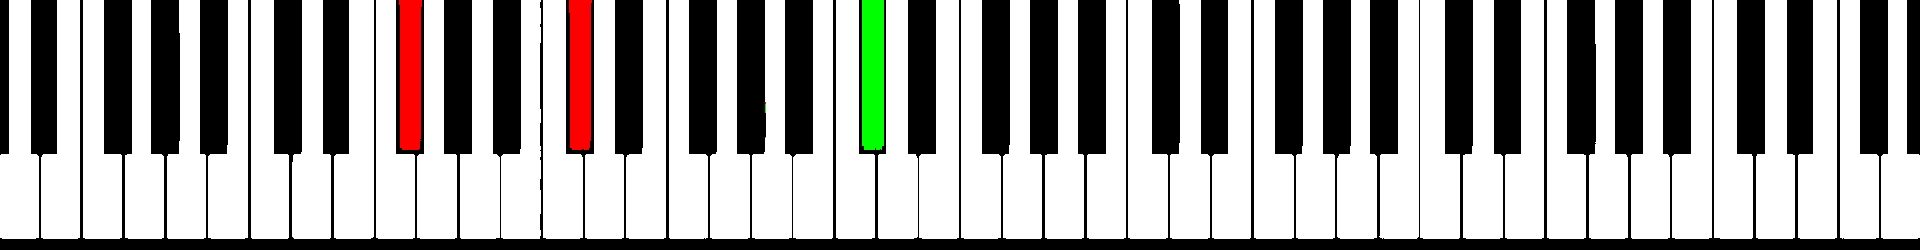

In [29]:
import importlib
import src.keyboard
import src.image
importlib.reload(src.image)
from src.image import frame_threshold
from src.image import frame_to_pil
from src.image import erase_by_color
from src.image import quantize_palette

# tmp = quantize_palette(frames[2], palette=palette)
frame_to_pil(frames[5])

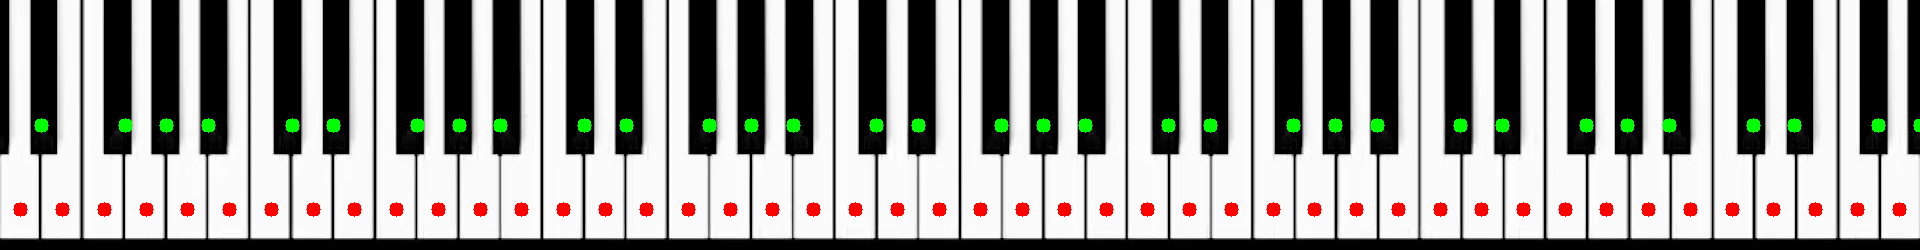

In [404]:
# seq = np.vstack(frames)
tmp = frames[0].copy()
tmp = np.repeat(tmp[..., None], 3, axis=2)
h, w, c = tmp.shape

for x in w_sp:
    cv2.circle(tmp, (int(x * w), h - h // 6), 2, (255, 0, 0), 10)

for x in b_sp:
    cv2.circle(tmp, (int(x * w), h // 2), 2, (0, 255, 0), 10)

frame_to_pil(tmp)

In [111]:
import abjad
# NOTE: Sharp is coded as <note_name>s
# NOTE: Flat  is coded as <note_name>f


# duration = abjad.Duration(1, 4)
# notes = [abjad.Note(pitch, duration) for pitch in range(8)]
# staff = abjad.Staff(notes)

staff = abjad.Staff([], name="Left-Hand")

for notes in music['left-hand']:
    voices = []
    if len(notes):
        for note in notes:
            name, octave = note.split('-')
            
            name = name.lower().replace('#', 's').replace('b', 'f')
            pitch = "'" * (int(octave) - 3) + ',' * (3 - int(octave))
            
            duration = abjad.Duration(1, 8)
            note = abjad.Note(name + pitch, duration)

            voice = abjad.Voice([note])
            voices.append(voice)
    else:
        voice = abjad.Voice('r ')
        voices = [voice]

    print(voices)
    tmp = abjad.Staff(voices, name="Left-Hand", simultaneous=True)

    staff.append(tmp)

key_signature = abjad.KeySignature(
    abjad.NamedPitchClass("fs"), abjad.Mode("major")
)

clef = abjad.Clef(name='bass')
abjad.attach(key_signature, staff[0][0][0])
abjad.attach(clef, staff[0][0][0])

print(music['left-hand'])
score = abjad.Score([staff], name="Example_Score")

# abjad.persist(score).as_png(preview=True)

abjad.show(score)

[Voice('r4')]
[Voice('cs8'), Voice('fs,8')]
[Voice('fs,8')]
[Voice('cs8'), Voice('fs,8')]
[Voice('cs8'), Voice('fs,8')]
[Voice('cs8'), Voice('fs,8')]
[Voice('fs,8')]
[Voice('cs8'), Voice('fs,8')]
[Voice('cs8'), Voice('fs,8')]
[Voice('fs,8')]
[Voice('cs8'), Voice('fs,8')]
[[], ['C#-3', 'F#-2'], ['F#-2'], ['C#-3', 'F#-2'], ['C#-3', 'F#-2'], ['C#-3', 'F#-2'], ['F#-2'], ['C#-3', 'F#-2'], ['C#-3', 'F#-2'], ['F#-2'], ['C#-3', 'F#-2']]


[[], [], [], [], ['F#-3'], ['C#-4'], ['C#-4'], ['C#-4'], ['A#-3'], ['G#-3'], ['G#-3']]


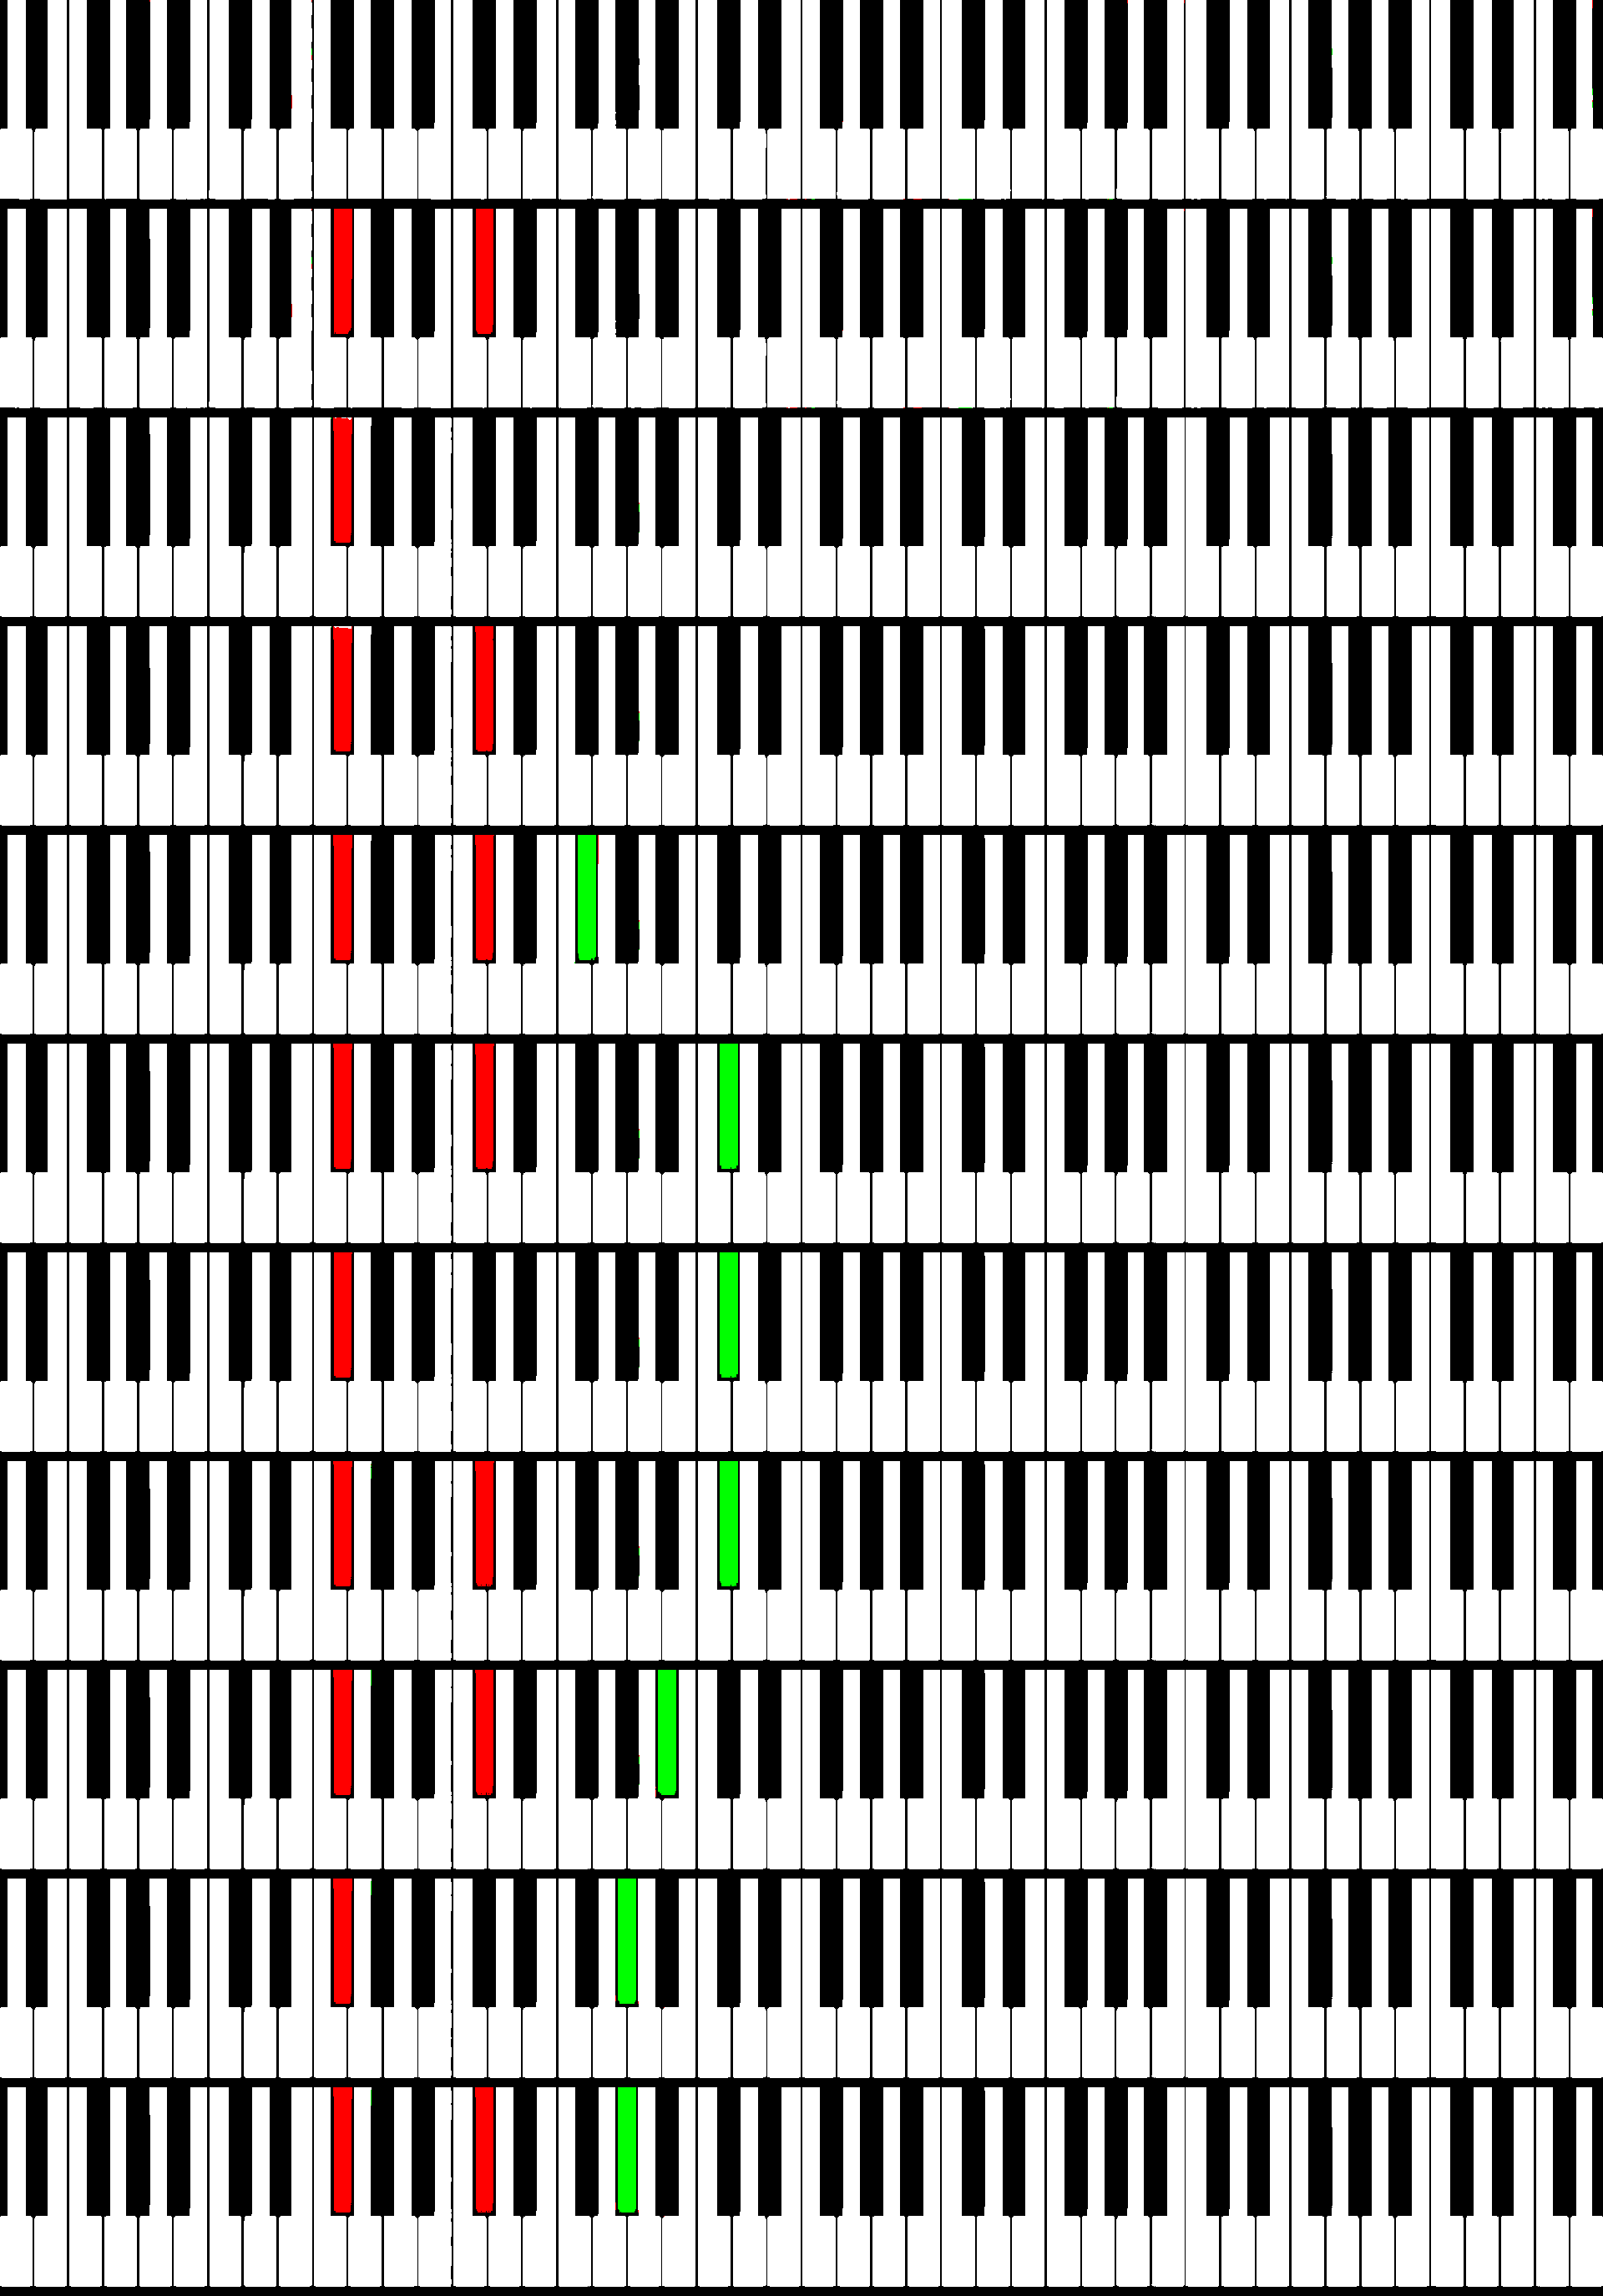

In [40]:
from src.image import frame_to_pil

print(music['right-hand'])
frame_to_pil(np.vstack(frames))